<a href="https://colab.research.google.com/github/MarcoMC1616/TelecomX-Parte2/blob/main/Challenge_TelecomX_LATAM_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📌 EXTRACCIÓN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/DataFrame.csv')
df = df.drop(columns=['CargosDiarios'])

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [2]:
# Ver las columnas disponibles
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [3]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


##🛠️ Preparación de los Datos


 ✔️ Remover columnas irrelevantes

In [4]:
df = df.drop(columns=['customerID'])

✔️ Verificación de la Proporción de Cancelación (Churn)

In [5]:
df.Churn.value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


 ✔️ Agrupación de No y No service

In [6]:
df_clean = df.copy()

cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

categorical_cols = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_1,gender_Male,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,13,55.15,742.90,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
7028,0,22,85.10,1873.70,True,True,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False
7029,0,2,50.30,92.75,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7030,0,67,67.85,4627.65,False,True,True,True,True,False,...,True,True,False,True,False,True,False,False,False,True


In [7]:
df_encoded['Charges.Total'] = pd.to_numeric(df_encoded['Charges.Total'], errors='coerce')
df_encoded.dropna(subset=['Charges.Total'], inplace=True)

In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   Charges.Monthly                        7032 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Churn_1                                7032 non-null   bool   
 5   gender_Male                            7032 non-null   bool   
 6   Partner_1                              7032 non-null   bool   
 7   Dependents_1                           7032 non-null   bool   
 8   PhoneService_1                         7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  Inte

✔️ Verificación nuevamente de los valores nulos


In [9]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
Churn_1,0
gender_Male,0
Partner_1,0
Dependents_1,0
PhoneService_1,0
MultipleLines_No phone service,0


In [10]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna()

In [11]:
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
Churn_1,0
gender_Male,0
Partner_1,0
Dependents_1,0
PhoneService_1,0
MultipleLines_No phone service,0


## ≡ Correlación entre las variables


In [12]:
col = df_encoded.pop('Churn_1')
df_encoded.insert(0, 'Churn_1', col)

corr = df_encoded.corr()

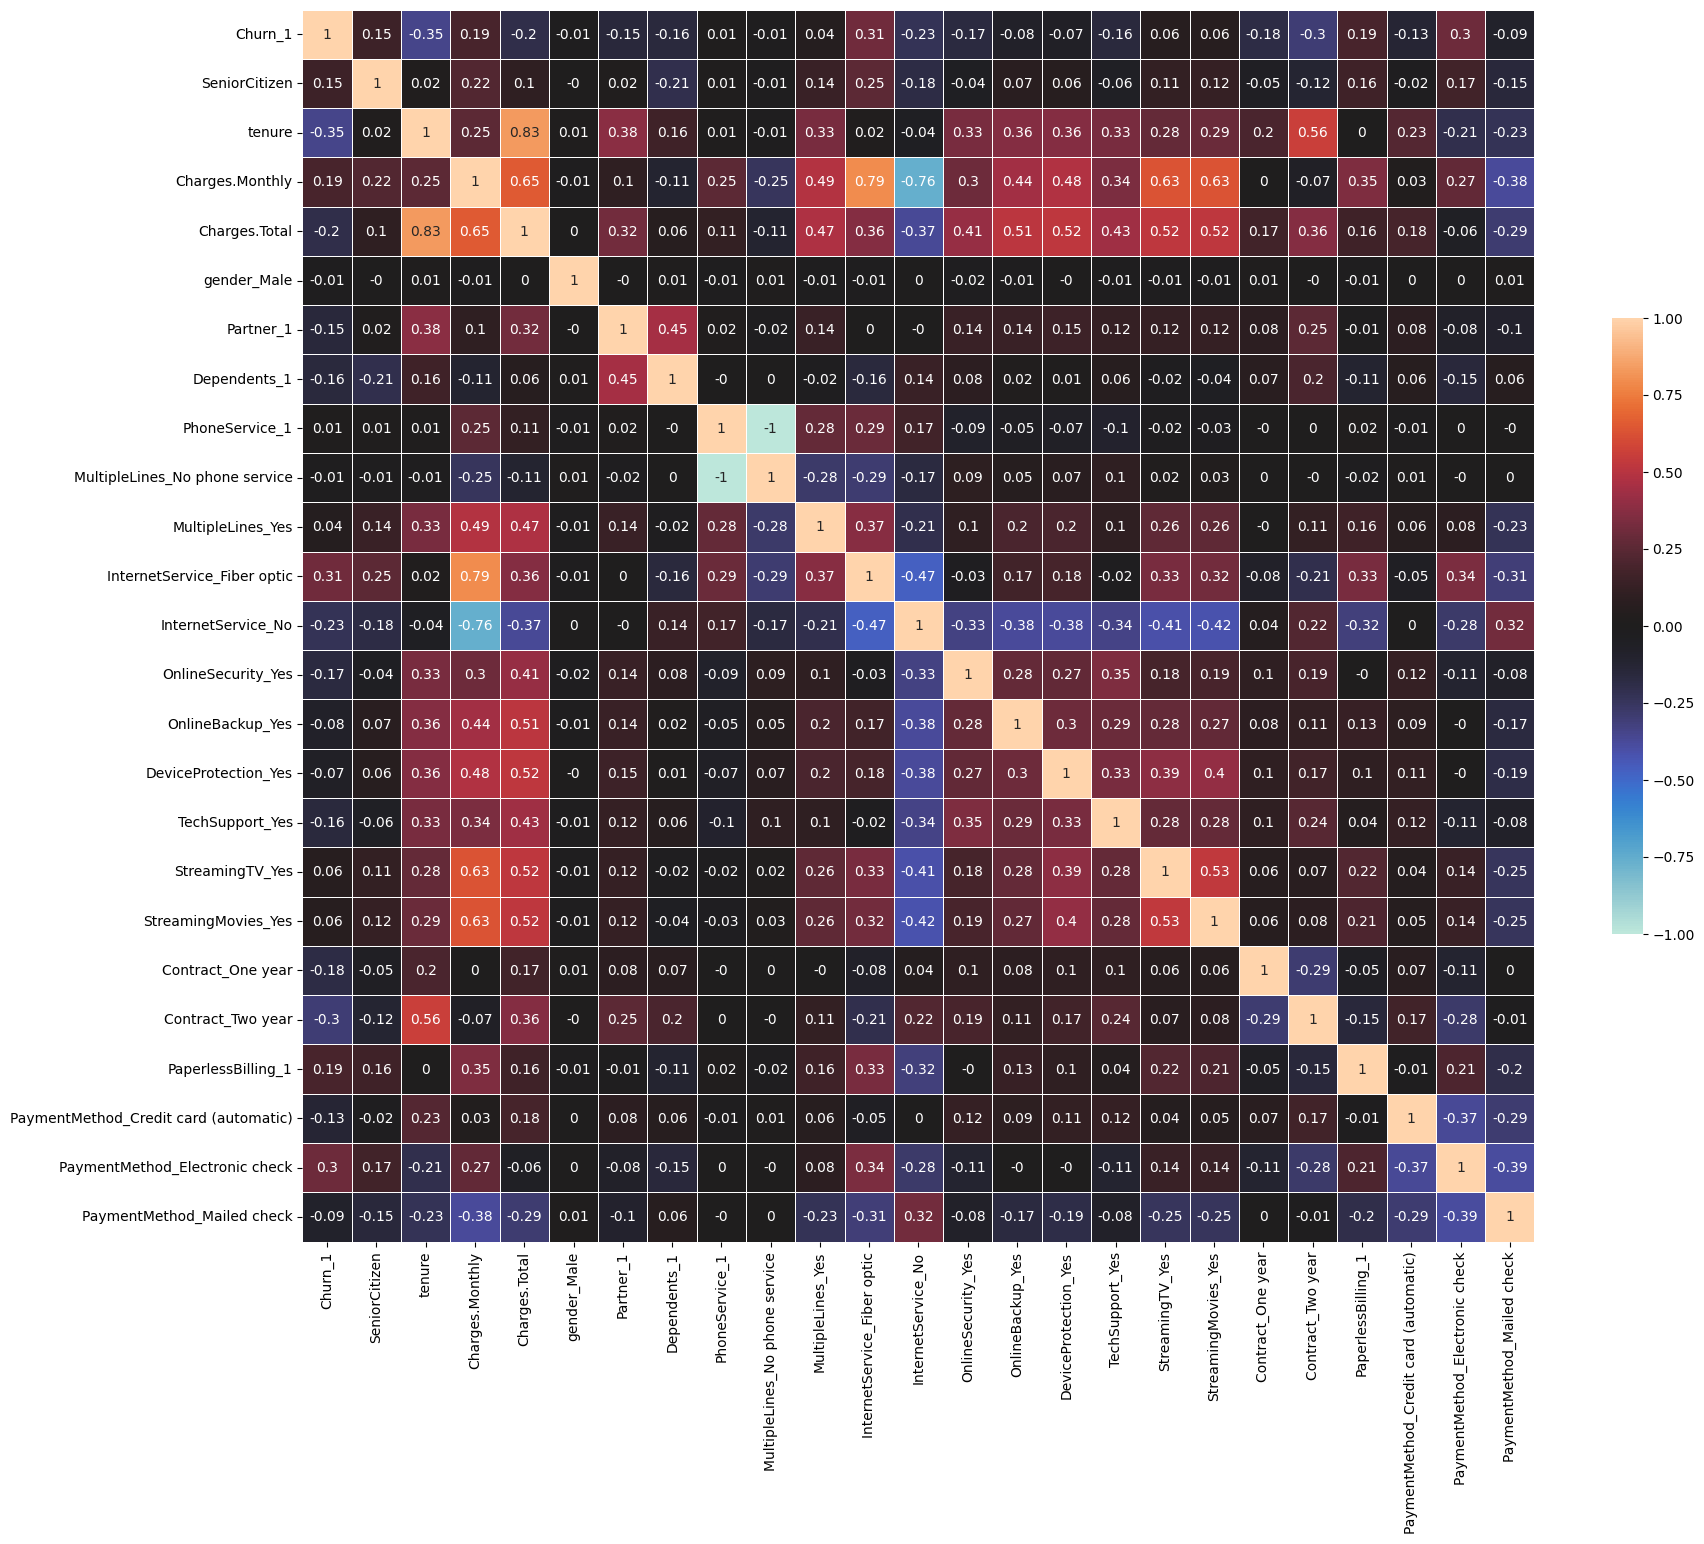

In [13]:
import numpy as np # Import the numpy library

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

✔️ Análisis Dirigido

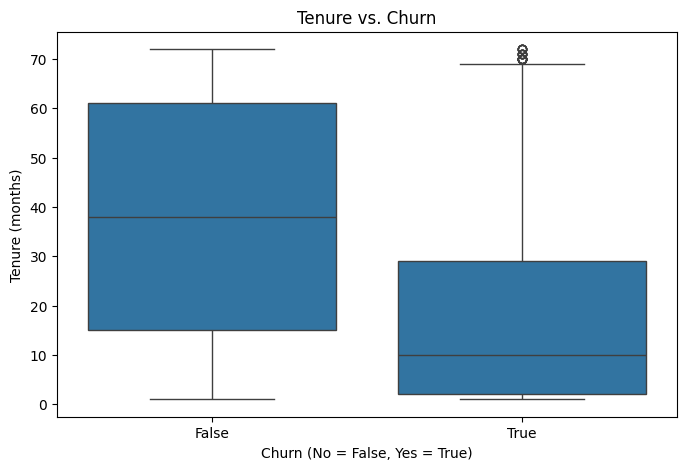

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_encoded, x='Churn_1', y='tenure')
plt.title('Tenure vs. Churn')
plt.xlabel('Churn (No = False, Yes = True)')
plt.ylabel('Tenure (months)')
plt.show()

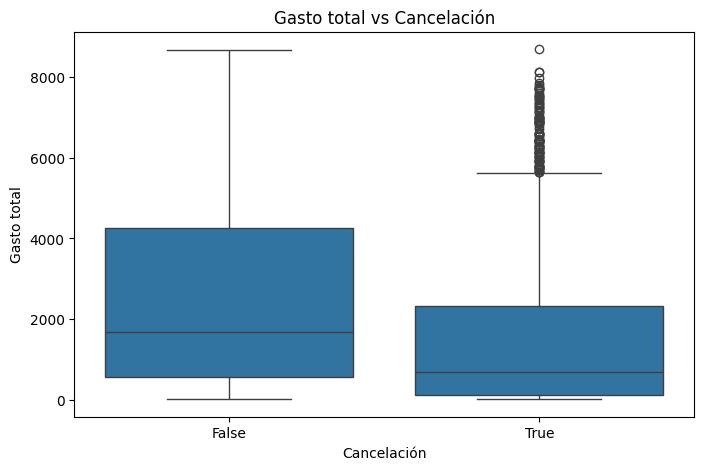

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_encoded,x='Churn_1', y='Charges.Total')
plt.title('Gasto total vs Cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Gasto total')
plt.show()

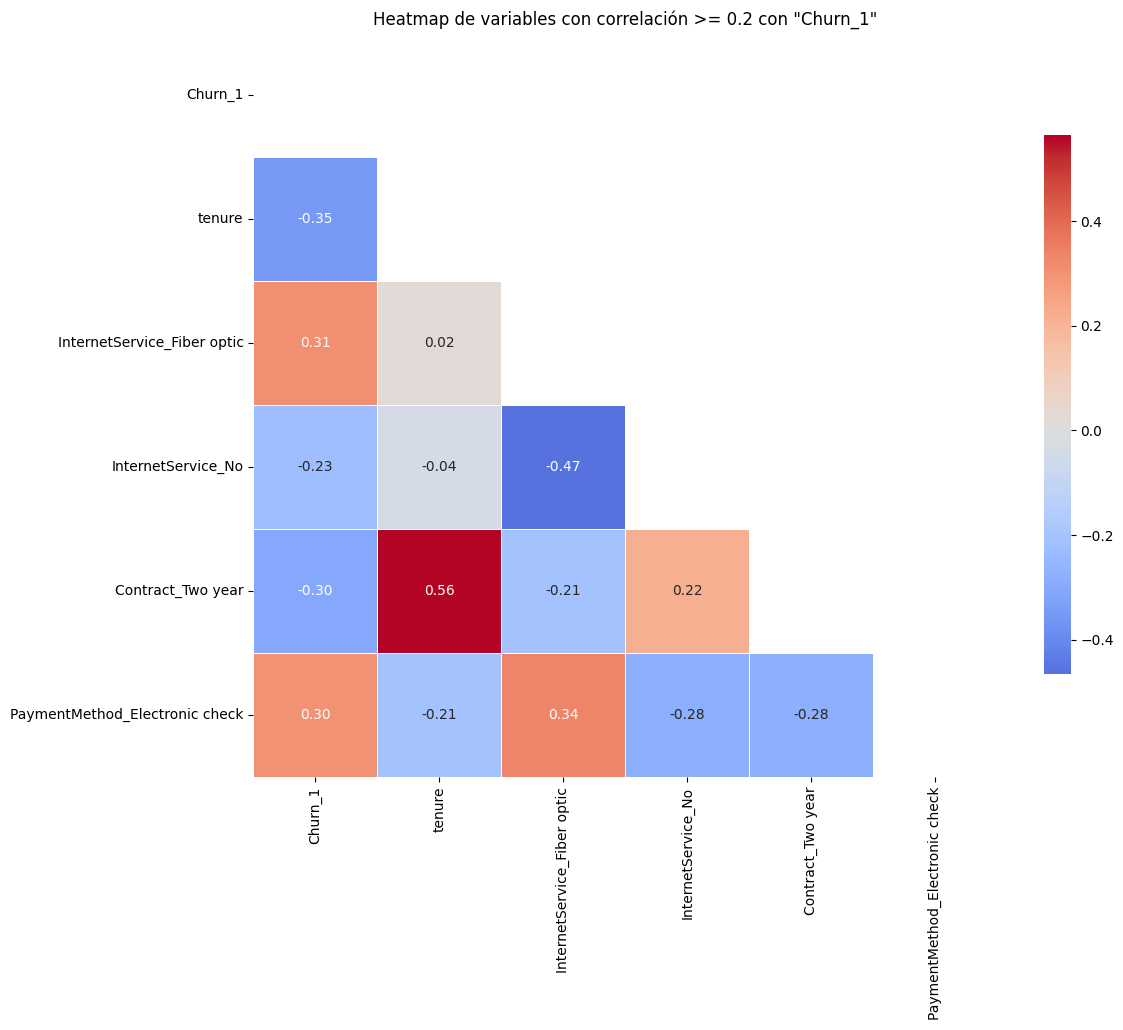

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Churn_1'

# Definir el umbral mínimo de correlación absoluta para selección
lim = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
var_relevantes = corr.index[abs(corr[target_var]) >= lim].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in var_relevantes:
    var_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[var_relevantes, var_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {lim} con "{target_var}"')
plt.show()

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.2** (o ≤ -0.2) con la variable objetivo `Churn_Yes`.

---

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                               |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |


## 🔍 Análisis de Multicolinealidad


2. **Usar análisis del Factor de Inflación de la Varianza (VIF):**

* El VIF ayuda a detectar la presencia de multicolinealidad entre variables independientes.
* Generalmente, **VIF > 5** o **VIF > 10** indica que la variable está colineal con otras y puede ser eliminada.


1. Importar las bibliotecas necesarias


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [18]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_1'])
y = df_encoded['Churn_1']

3. Añadir constante (intercepto)

In [19]:
X_const = add_constant(X)

4. Calcular el VIF

In [20]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
8,PhoneService_1,inf
9,MultipleLines_No phone service,inf
3,Charges.Monthly,866.089640
11,InternetService_Fiber optic,148.500814
12,InternetService_No,104.213701
18,StreamingMovies_Yes,24.156394
17,StreamingTV_Yes,24.080019
4,Charges.Total,10.811490
2,tenure,7.584453
10,MultipleLines_Yes,7.289761


In [21]:
# Se eliminan columnas que dependen mucho de otras
X_const = X_const.drop(columns=['Charges.Monthly'])
X_const = X_const.drop(columns=['PhoneService_1'])

**VIF REHECHO**

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para no modificar el original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variables con alta multicolinearidad ======
cols_to_drop = [
    "Charges.Total", # Alta correlacion con Charges.Monthly y tenure
    "InternetService_No" # Redondante con InternetService_Fiber optic
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Garantizar que los dados estan en float para el VIF ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 4: Recalcular el VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 5: Escribir los resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,12.387233
2,tenure,2.794867
16,Contract_Two year,2.456472
19,PaymentMethod_Electronic check,1.967241
20,PaymentMethod_Mailed check,1.817623
8,InternetService_Fiber optic,1.794282
14,StreamingMovies_Yes,1.616972
13,StreamingTV_Yes,1.609420
15,Contract_One year,1.574436
18,PaymentMethod_Credit card (automatic),1.560588


## 🤖 Modelos Predictivos


Importación de las bibliotecas

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar features y target

In [24]:
X = df_encoded.drop(columns=['Churn_1'])
y = df_encoded['Churn_1']

Dividir entrenamiento y prueba


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [27]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [28]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7511848341232228
ROC AUC: 0.8454813582220259
Matriz de Confusión:
 [[1130  419]
 [ 106  455]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



**Random Forest**

In [29]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8207457171494692
Matriz de Confusión:
 [[1309  240]
 [ 227  334]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



### Análisis de modelos

Refinado de modelos

RandomForest

In [30]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
            }
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_bal, y_train_bal)
best_rf = grid_search.best_estimator_

In [31]:
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:,1]
threshold = 0.6
y_pred_rf = (y_prob_rf >= threshold).astype(int)

In [32]:
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7834123222748816
ROC AUC: 0.8237486320310152
Matriz de Confusión:
 [[1384  165]
 [ 292  269]]
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1549
        True       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [33]:
var_importantes = best_rf.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'feature': features, 'importance': var_importantes})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df.head(10))

                           feature  importance
1                           tenure    0.160252
3                    Charges.Total    0.134788
2                  Charges.Monthly    0.133322
19               Contract_Two year    0.061971
10     InternetService_Fiber optic    0.054864
22  PaymentMethod_Electronic check    0.051506
20              PaperlessBilling_1    0.039339
18               Contract_One year    0.036570
15                 TechSupport_Yes    0.033366
12              OnlineSecurity_Yes    0.031431


### Anáisis Final

Interpretación de las variables más relevantes

Tenure (0.160)
Es la variable con mayor impacto: los clientes con menor tiempo de permanencia son más propensos a cancelar el servicio.
Estrategia: ofrecer recompensas iniciales, programas de lealtad o beneficios que incentiven a permanecer activo durante los primeros meses.

Charges.Total (0.134)
Un mayor monto acumulado en cargos totales está asociado con un incremento en el riesgo de cancelación.
Estrategia: implementar planes de pago adaptados a cada cliente o descuentos progresivos según el tiempo que lleven en la empresa.